In [ ]:
import scipy
print(scipy.__version__)
from google.colab import drive
drive.mount('/content/drive')
from scipy.io import loadmat
# 加载MATLAB文件
filename = '/content/drive/MyDrive/'

1.11.4
Mounted at /content/drive


<ipython-input-2-e2c40dc38657>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clicks.index, y=clicks.values, palette='viridis')


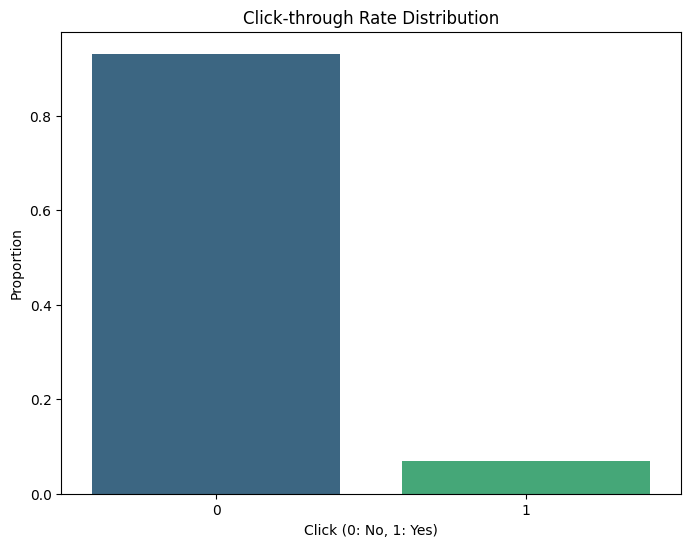

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
file_path = filename + 'click_rate/train.csv'
data = pd.read_csv(file_path)

# 删除有空值的行
data_cleaned = data.dropna()

# 数据可视化 - 点击率的占比
clicks = data_cleaned['isClick'].value_counts(normalize=True)

# 绘制点击率分布
plt.figure(figsize=(8, 6))
sns.barplot(x=clicks.index, y=clicks.values, palette='viridis')
plt.title('Click-through Rate Distribution')
plt.xlabel('Click (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.show()


In [ ]:
data.shape
print(data[:100])

    id         date  user_id  product  campaign_id  webpage_id  \
0    0  07-02 00:00        0        0            0           0   
1    1  07-02 00:00        1        0            1           1   
2    2  07-02 00:00        1        0            0           0   
3    3  07-02 00:00        2        1            0           0   
4    4  07-02 00:01        3        0            2           2   
..  ..          ...      ...      ...          ...         ...   
95  95  07-02 00:11       60        8            4           3   
96  96  07-02 00:11       60        1            4           3   
97  97  07-02 00:11       61        0            0           0   
98  98  07-02 00:11       62        0            3           0   
99  99  07-02 00:12       63        8            4           3   

    product_category_id  user_group_id  gender  age_level  user_depth  var_1  \
0                     0           10.0  Female        4.0         3.0      0   
1                     1            8.0  Female 

In [ ]:
def calculate_f1(y_true, y_pred):
    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)

    # 提取TP, FP, FN, TN
    TP = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # 计算Precision和Recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # 计算F1得分
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1

        user_id  product  campaign_id  webpage_id  product_category_id  \
0             0        0            0           0                    0   
1             1        0            1           1                    1   
2             1        0            0           0                    0   
3             2        1            0           0                    2   
4             3        0            2           2                    2   
...         ...      ...          ...         ...                  ...   
391820    44038        1            9           8                    0   
391821   135658        3            9           8                    1   
391822   135658        3            9           8                    1   
391823    39562        0            3           0                    1   
391824    39562        0            0           0                    0   

        user_group_id  age_level  user_depth  var_1  gender_Female  \
0                10.0        4.0         

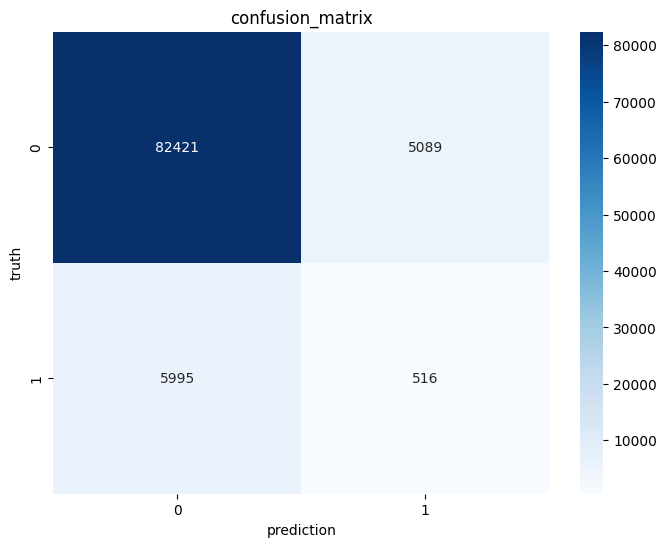

In [ ]:
# 移除 'date' 列以减少内存使用
data_reduced = data_cleaned.drop(columns=['date'])

# 将分类变量转换为哑变量
data_reduced = pd.get_dummies(data_reduced, columns=['gender'])

# 定义特征和目标变量
X = data_reduced.drop(columns=['isClick', 'id'])
print(X)
y = data_reduced['isClick']

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 初始化并训练决策树模型
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = clf.predict(X_test)

# 计算模型的准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'模型的准确率: {accuracy}')

# 计算F1得分
f1 = calculate_f1(y_test, y_pred)
print(f'F1得分: {f1}')

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('prediction')
plt.ylabel('truth')
plt.title('confusion_matrix')
plt.show()